<h1 style="color:indigo; text-align:center"><span style="color:red">|</span> ASSIGNMENT 1 <span style="color:red">|</span></h1>

### I participated in the [Regression with Abalone Dataset](https://www.kaggle.com/c/playground-series-s4e4/). At the time of submission my best rank was **1267** out of **2418** participants which puts me at top 50%.
<img src="best.png">

### For the assignment, I had taken 3 Competitions into consideration.

[Housing Dataset](https://www.kaggle.com/competitions/home-data-for-ml-course)

**About the dataset**- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges we need to predict the final price of each home.

<img src="Housing Prices.png">

[Wild Blueberry Dataset](https://www.kaggle.com/competitions/playground-series-s3e14) 

**About the dataset**- The task is to use regression to predict the yield of wild blueberries.

<img src="Wild Blueberry Yield Dataset.png">

 

**Link to competition:** [Regression with an Abalone Dataset](https://www.kaggle.com/competitions/playground-series-s4e4)

 <img src="Abalone chosen.png">

 ### I chose to do the Ablaone Dataset one as it is still live and had a lot of participants. It presents a regression task where I have to predict the age of abalone based on physical measurements, helping me grasp fundamental regression concepts. Through this dataset, I can practice data exploration, preprocessing, model selection, and evaluation, including techniques like feature engineering and visualization. Experimenting with various regression algorithms and evaluation metrics allows me to understand model performance better. 

<h1 style="color:indigo; text-align:center"><span style="color:red">|</span> DESCRIPTION OF DATA <span style="color:red">|</span></h1>

**Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.**

The data we are going to use have the following features.

|**Variable Name** | **Role** | **Type** | **Description** | **Units** | **Missing Values** |
| :---- | :-----: | :----: | :---- | :----: | :----: |
|Sex | Feature | Categorical | M, F, and I (infant) | | no |
|Length | Feature | Continuous | Longest shell measurement | mm | no |
|Diameter | Feature | Continuous | perpendicular to length | mm | no |
|Height | Feature | Continuous |  with meat in shell | mm | no |
|Whole_weight | Feature | Continuous | whole abalone | grams | no
|Whole_weight.1 | Feature | Continuous |Shucked Weight in previous competitions weight of meat | grams | no |
|Whole_weight.2 | Feature | Continuous |Visceral Weight in previous competitions gut weight (after bleeding) | grams | no |
|Shell_weight | Feature | Continuous | after being dried | grams | no |
|Rings | Target | Integer | +1.5 gives the age in years | | no |

<h1 style="color:indigo; text-align:center"><span style="color:red">|</span> IMPORTING MODULES AND READING THE DATASET<span style="color:red">|</span></h1>

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,make_scorer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np,pandas as pd ,seaborn as sns,matplotlib.pyplot as plt

In [36]:
tr_df = pd.read_csv('train.csv',index_col='id')
te_df = pd.read_csv('test.csv',index_col='id')

In [37]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [38]:
tr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,90615.0,0.517098,0.118217,0.0750,0.4450,0.5450,0.6000,0.8150
Diameter,90615.0,0.401679,0.098026,0.0550,0.3450,0.4250,0.4700,0.6500
Height,90615.0,0.135464,0.038008,0.0000,0.1100,0.1400,0.1600,1.1300
Whole weight,90615.0,0.789035,0.457671,0.0020,0.4190,0.7995,1.0675,2.8255
Whole weight.1,90615.0,0.340778,0.204428,0.0010,0.1775,0.3300,0.4630,1.4880
Whole weight.2,90615.0,0.169422,0.100909,0.0005,0.0865,0.1660,0.2325,0.7600
Shell weight,90615.0,0.225898,0.130203,0.0015,0.1200,0.2250,0.3050,1.0050
Rings,90615.0,9.696794,3.176221,1.0000,8.0000,9.0000,11.0000,29.0000


<h1 style="color:indigo; text-align:center"><span style="color:red">|</span>EXPLORATORY DATA ANALYSIS<span style="color:red">|</span></h1>

In [39]:
numeric_columns = tr_df.select_dtypes(include='number')
numeric_columns.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [40]:
numeric_columns_without_tg = numeric_columns.drop(['Rings'],axis=1)

In [41]:
cols_interested = ['Sex', 'Length', 'Diameter', 'Height',  'Shell weight','Whole weight', 'Whole weight.1',
       'Whole weight.2']
X,y = tr_df[cols_interested],tr_df['Rings']

## Histograms

**The following plots show the distribution of different numerical features using historgrams.**

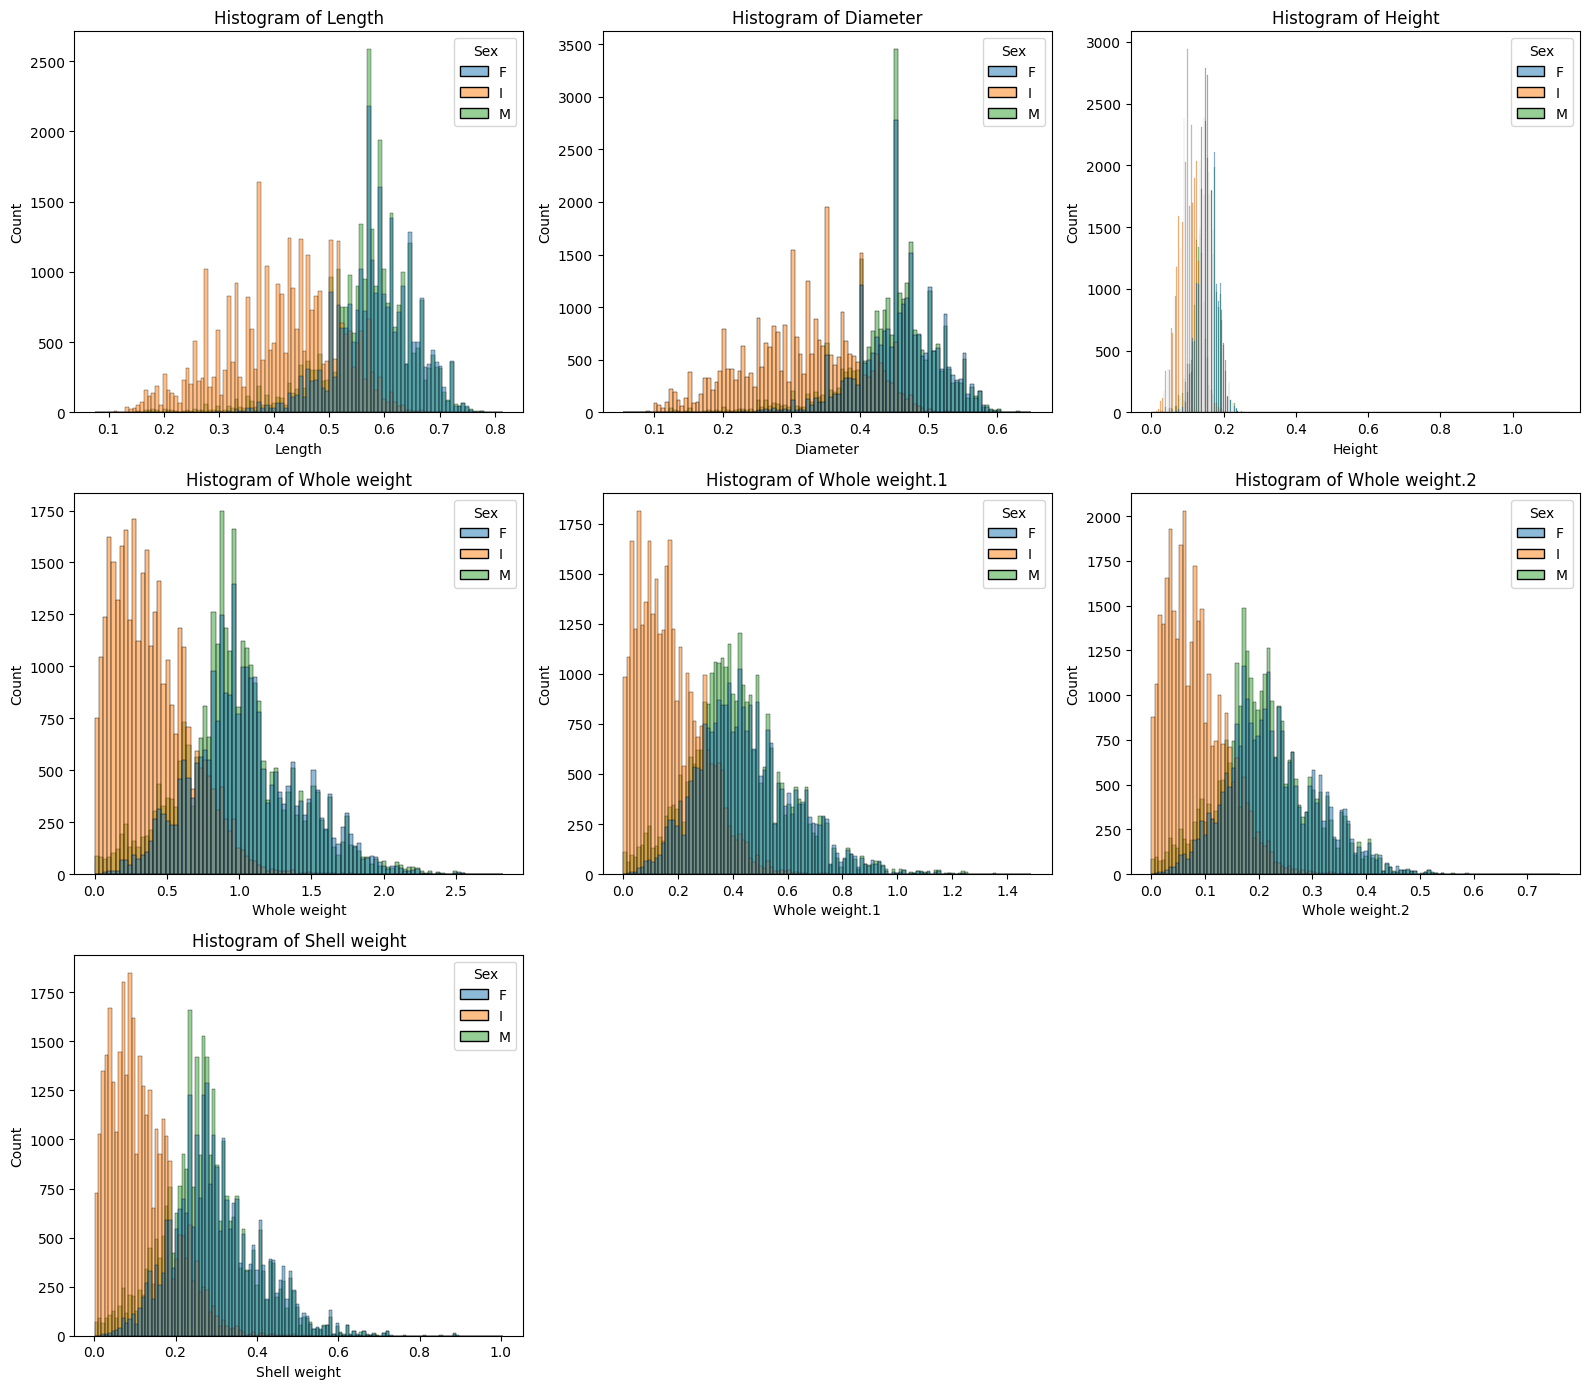

In [42]:
plt.figure(figsize=(16,len(numeric_columns_without_tg.columns)*2))
for i,col in enumerate(numeric_columns_without_tg):
    plt.subplot(3,3,i+1)
    sns.histplot(x=col,data=X,hue='Sex')
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
plt.show()

## Box Plots

Let's plot the box plot for each variables to understand how they are distributed and if they have outliers.

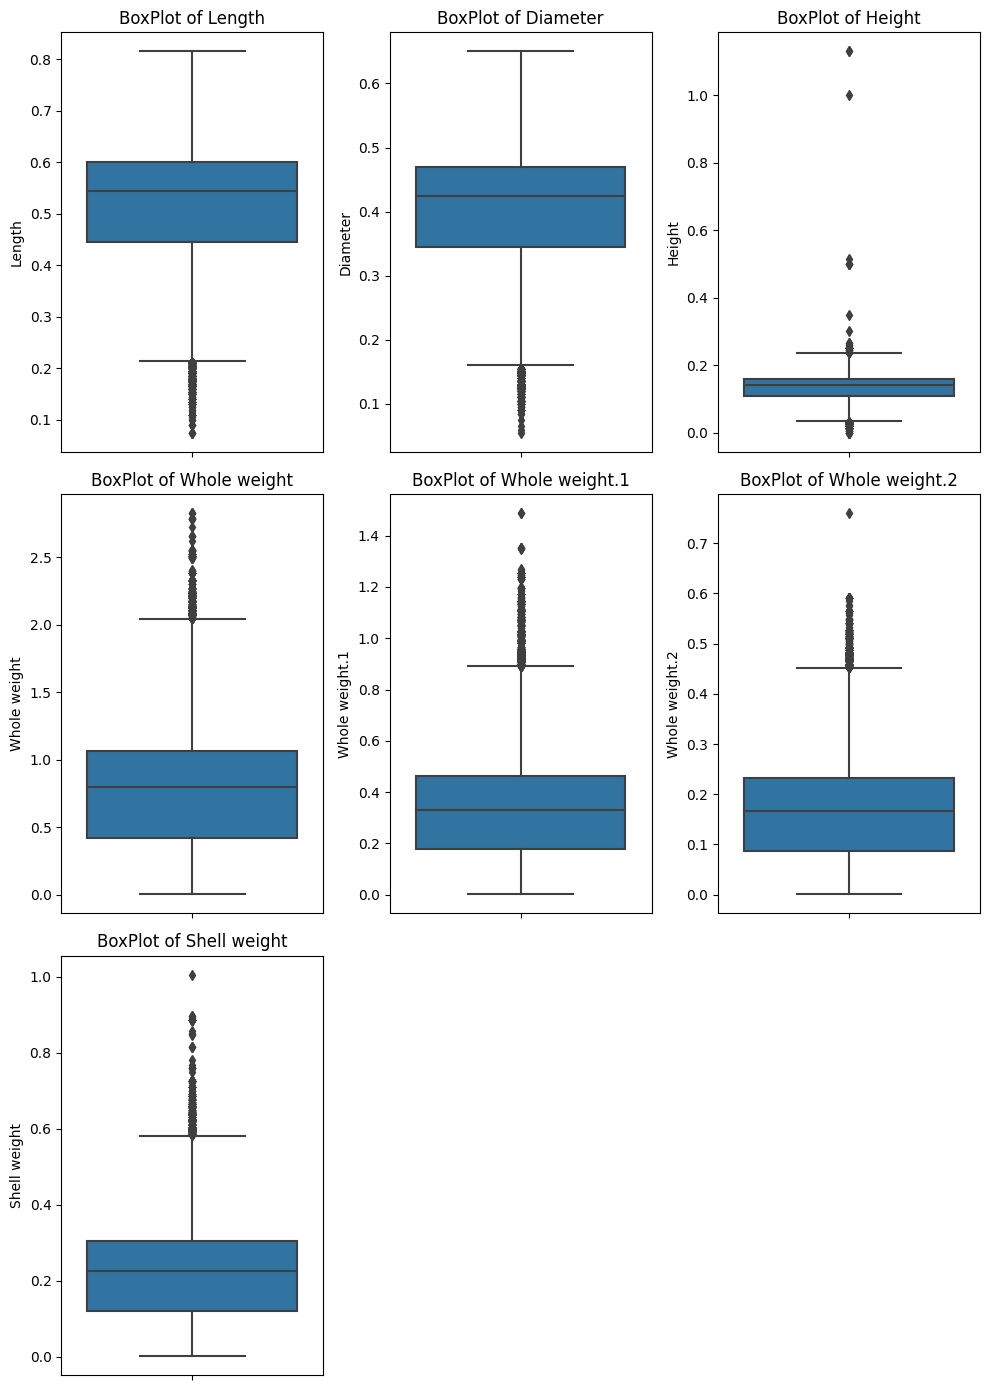

In [43]:
plt.figure(figsize=(10,len(numeric_columns_without_tg.columns)*2))
for i,col in enumerate(numeric_columns_without_tg):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=col,data=X)
    plt.title(f"BoxPlot of {col}")
    plt.tight_layout()
plt.show()

**Here we can see that out data have outliers, but we don't need to remove them as models we are going use are not sensitive to outliers.**


## Pair Plot

Pair plot show the bivariate distribution of the varibles i.e. how they behave with each other.


<Figure size 1200x800 with 0 Axes>

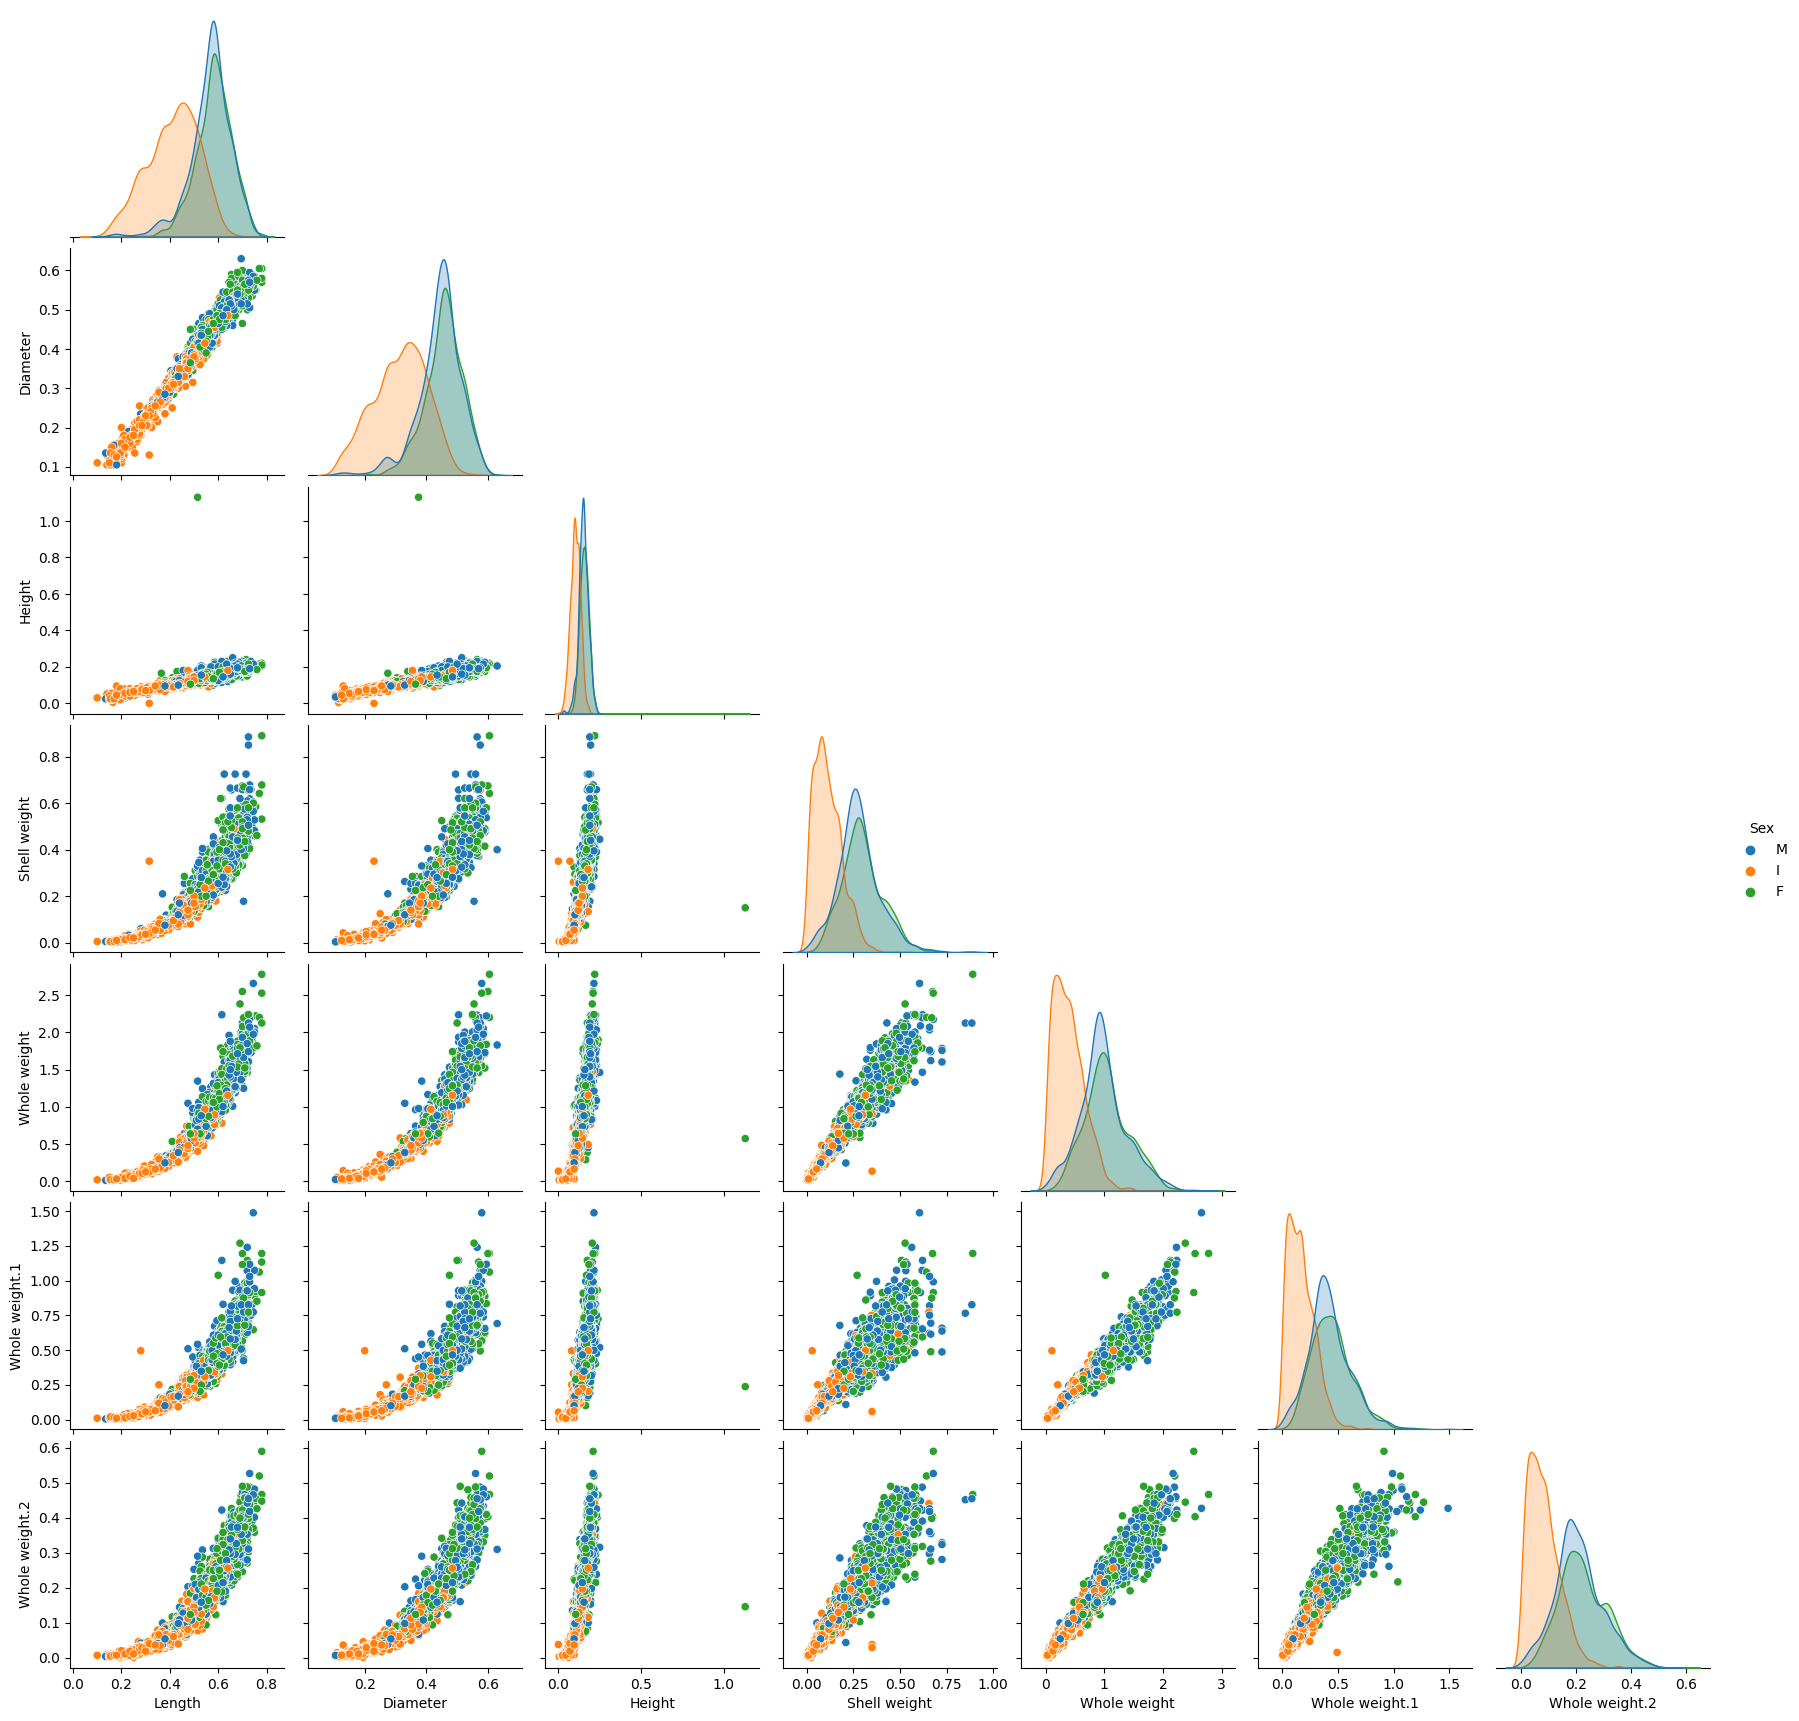

In [44]:
plt.figure(figsize=(12,8))
sns.pairplot(data=X.sample(frac=0.05),hue='Sex',corner=True)
plt.show()

<h1 style="color:indigo; text-align:center"><span style="color:red">|</span> TRANSFORMING THE DATA <span style="color:red">|</span></h1>

**I started with train test splitting the train dataset, so I can evaluate my model before I could submit. The evaluation metric for this competition is Root Mean Squared Logarithmic Error.However, i focused on the MSE and r2 score metrics while I evaluated my models.**

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

**I used a few feature transformation techniques to increase the performance of the models. I had initially started with no feature transformation at the beginning and had a score of 0.18+ 
By leveraging the OneHotEncoding, QuantileTransformation I was able to get it down to .16
However, after I added the LogTransformation of the dependent variable my score started to get better.** 

In [46]:
# Custom transformer for log transformation of the target variable
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.log1p(X)
    
def preprocessing(OneHotEncodingCols,QuantileTransformCols):
    preprocessor = ColumnTransformer(
    transformers=[
        ('One Hot Sex', OneHotEncoder(), OneHotEncodingCols),
        ('Quantile Transform',QuantileTransformer(),QuantileTransformCols)  ,
    ],
    remainder='passthrough'
    )
    return preprocessor 


OneHotEncodingCols=['Sex']
QuantileTransformCols=['Length', 'Diameter', 'Height',  'Shell weight','Whole weight', 'Whole weight.1','Whole weight.2']
TargetCols=['Rings']


<h1 style="color:indigo; text-align:center"><span style="color:red">|</span> MODEL TRAINING <span style="color:red">|</span></h1>

# First Model with Linear Regression

**I started off with a simple LinearRegression model. I used the transformation and preprocessing in all the Models.** 

In [47]:
LinearRegressionModel = Pipeline(steps=[
    ('preprocessor', preprocessing(OneHotEncodingCols=OneHotEncodingCols,QuantileTransformCols=QuantileTransformCols)), # Preprocessing step
       ('log_transform',LogTransformer()),
    ('regressor', LinearRegression(positive=True))  # The regression model
])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
LinearRegressionModel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Sex',
                                                  OneHotEncoder(), ['Sex']),
                                                 ('Quantile Transform',
                                                  QuantileTransformer(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Shell weight',
                                                   'Whole weight',
                                                   'Whole weight.1',
                                                   'Whole weight.2'])])),
                ('log_transform', LogTransformer()),
                ('regressor', LinearRegression(positive=True))])

In [48]:
y_pred = LinearRegressionModel.predict(X_test)

In [49]:
mean_squared_error(y_test,y_pred)

5.338427164754465

In [50]:
r2_score(y_test,y_pred)

0.48302390614691926

**The LinearRegression seems to be randomly guessing and has a very low r2_score.Doing some feature engineering like making new features may improve the model performance.However I focused on choosing different models first and tried to model ensembing using Voting Regressor.The second model I went with was the RandomForestRegression.**

# Second model with RandomForest

In [51]:
from sklearn.ensemble import RandomForestRegressor as RFR 

rfr = RFR(random_state=42)


In [52]:
RandomForestRegressorModel = Pipeline(steps=[
    ('preprocessor', preprocessing(OneHotEncodingCols=OneHotEncodingCols,QuantileTransformCols=QuantileTransformCols)), # Preprocessing step
       ('log_transform',LogTransformer()),
    ('regressor', rfr)  # The regression model
])
RandomForestRegressorModel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Sex',
                                                  OneHotEncoder(), ['Sex']),
                                                 ('Quantile Transform',
                                                  QuantileTransformer(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Shell weight',
                                                   'Whole weight',
                                                   'Whole weight.1',
                                                   'Whole weight.2'])])),
                ('log_transform', LogTransformer()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [53]:
y2_pred = RandomForestRegressorModel.predict(X_test)

In [54]:
r2_score(y_test,y2_pred)

0.6452592293748391

**The r2_score is much better with this model.I had submitted to Kaggle and got a better score from my previous models. I tried to better my model performance with other models discussed below**

<img src ="Kaggle leaderboard.png">

# Third model with Ridge and Grid Search

**Then I went for a Ridge Regressor and I used GridSearchCV to find the optimal parameter for alpha. I got the best parameter at 0.05**

In [55]:

neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
ridge = Ridge()
param_grid_ridge = {
    'alpha' : [0.0025,0.05,0.1,0.2,0.3,1,5,10,15,30,50,100]
}


In [56]:

ridge_cv = GridSearchCV(ridge,param_grid=param_grid_ridge,cv=5,n_jobs=-1,scoring=neg_mse_scorer)

In [57]:
RidgeModel = Pipeline(steps=[
    ('preprocessor', preprocessing(OneHotEncodingCols=OneHotEncodingCols,QuantileTransformCols=QuantileTransformCols)), # Preprocessing step
       ('log_transform',LogTransformer()),
    ('regressor', ridge_cv)  # The regression model
])

RidgeModel.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Sex',
                                                  OneHotEncoder(), ['Sex']),
                                                 ('Quantile Transform',
                                                  QuantileTransformer(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Shell weight',
                                                   'Whole weight',
                                                   'Whole weight.1',
                                                   'Whole weight.2'])])),
                ('log_transform', LogTransformer()),
                ('regressor',
                 GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                              param_grid={'alpha': [0.0025, 0.05, 0.1, 0.2, 0.3,
                                                    1, 5, 10, 15, 30, 50,
                                                    100]},
                              scoring=make_scorer(mean_squared_error, greater_is_better=False)))])

In [58]:
ridge_cv.best_estimator_

Ridge(alpha=0.05)

In [59]:
y3_pred = RidgeModel.predict(X_test)
r2_score(y_test,y3_pred)

0.5926319474962651

**The r2_score is lower than the RandomForestRegressorModel. So I ended up with a low performing model. Maybe we need to look at other parameters.I then tried a fourth model with GBRegressor**

# Fourth Model with GradientBoostingRegressor 

In [61]:
gb = GradientBoostingRegressor()
param_grid_gb = {'learning_rate':[0.05,0.1,0.5]}
gb_cv = GridSearchCV(gb,param_grid=param_grid_gb,n_jobs=-1,scoring=neg_mse_scorer)
GradientBoostingRegressorModel = Pipeline(steps=[
    ('preprocessor', preprocessing(OneHotEncodingCols=OneHotEncodingCols,QuantileTransformCols=QuantileTransformCols)), # Preprocessing step
       ('log_transform',LogTransformer()),
    ('Gradient Boosting regressor', gb_cv)  # The regression model
])
GradientBoostingRegressorModel.fit(X_train,y_train)
y4_pred = GradientBoostingRegressorModel.predict(X_test)

In [62]:
r2_score(y_test,y4_pred)

0.6589515943818596

### So far, this is the best model we achieved. This one brought me at the top 50%. 
**I then tried ensembling the models to see if they would do better.VotingRegressor is a technique used in ensemble learning where multiple base estimators (regression models) are combined to improve the overall predictive performance. It works by averaging the predictions of individual regressors to obtain a final prediction.**

# Ensemble Different models 

In [65]:
lr = LinearRegressionModel
cross_val_score(lr,X,y).mean()

0.4879825653435145

In [66]:
rfr = RandomForestRegressorModel
cross_val_score(rfr,X,y).mean()

0.6503991137691167

In [67]:
ridge = RidgeModel
cross_val_score(ridge,X,y).mean()

-4.124355271130991

In [68]:
gboost = GradientBoostingRegressorModel
cross_val_score(gboost,X,y).mean()

-3.4437220347523763

In [69]:
vr = VotingRegressor([
    ('lr',lr),('rfr',rfr)],weights=[1,2]
    )
cross_val_score(vr,X,y).mean()

0.6423010758812195

In [70]:
vr2 = VotingRegressor([
    ('lr',lr),('rfr',rfr),('gboost',gboost)],weights=[1,2,4]
    )
cross_val_score(vr2,X,y).mean()

0.6621795575903502

In [74]:
vr.fit(X_train,y_train)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Sex',
                                                                               OneHotEncoder(),
                                                                               ['Sex']),
                                                                              ('Quantile '
                                                                               'Transform',
                                                                               QuantileTransformer(),
                                                                               ['Length',
                                                                                'Diameter',
                                                                                'Height',
                                                                                'Shell '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight.1',
                                                                                'Whole '
                                                                                'weight.2'])])),
                                             ('log_transform',
                                              LogTransformer()),
                                             ('r...
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Sex',
                                                                               OneHotEncoder(),
                                                                               ['Sex']),
                                                                              ('Quantile '
                                                                               'Transform',
                                                                               QuantileTransformer(),
                                                                               ['Length',
                                                                                'Diameter',
                                                                                'Height',
                                                                                'Shell '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight.1',
                                                                                'Whole '
                                                                                'weight.2'])])),
                                             ('log_transform',
                                

In [71]:
vr2.fit(X_train,y_train)


VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot '
                                                                               'Sex',
                                                                               OneHotEncoder(),
                                                                               ['Sex']),
                                                                              ('Quantile '
                                                                               'Transform',
                                                                               QuantileTransformer(),
                                                                               ['Length',
                                                                                'Diameter',
                                                                                'Height',
                                                                                'Shell '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight.1',
                                                                                'Whole '
                                                                                'weight.2'])])),
                                             ('log_transform',
                                              LogTransformer()),
                                             ('r...
                                                                               ['Length',
                                                                                'Diameter',
                                                                                'Height',
                                                                                'Shell '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight',
                                                                                'Whole '
                                                                                'weight.1',
                                                                                'Whole '
                                                                                'weight.2'])])),
                                             ('log_transform',
                                              LogTransformer()),
                                             ('Gradient Boosting regressor',
                                              GridSearchCV(estimator=GradientBoostingRegressor(),
                                                           n_jobs=-1,
                                                           param_grid={'learning_rate': [0.05,
                                                                                         0.1,
                                                                                         0.5]},
                                                           scoring=make_scorer(mean_squared_error, greater_is_better=False)))]))],
                weights=[1, 2, 4])

In [75]:
y5_pred = vr.predict(X_test)
r2_score(y_test,y5_pred)

0.6360869253945084

In [72]:
y6_pred = vr2.predict(X_test)
r2_score(y_test,y6_pred)

0.6583662356736653

My sixth result got me the best performance. There is scope to improve the model further by doing some feature engineering and by doing hyper parameter tuning. 

## BEST SUBMISSION
<img src="best.png">

# Choose final model and submit

In [76]:
model_name = vr2
predictions = model_name.predict(te_df)
submission = pd.DataFrame({
    'id': te_df.index,
    'Rings': predictions
})

Checking if any predictions is negative

In [77]:
submission.query('Rings<0')

,id,Rings


In [78]:
filename = 'EnsembleFinal'

In [79]:
submission.to_csv(f"{filename}.csv",index=False)